In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [36]:
df = pd.read_csv('/home/rohan/Documents/JupyterProjects/FINAL-TF2-FILES/TF_2_Notebooks_and_Data/DATA/kc_house_data.csv')

In [37]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

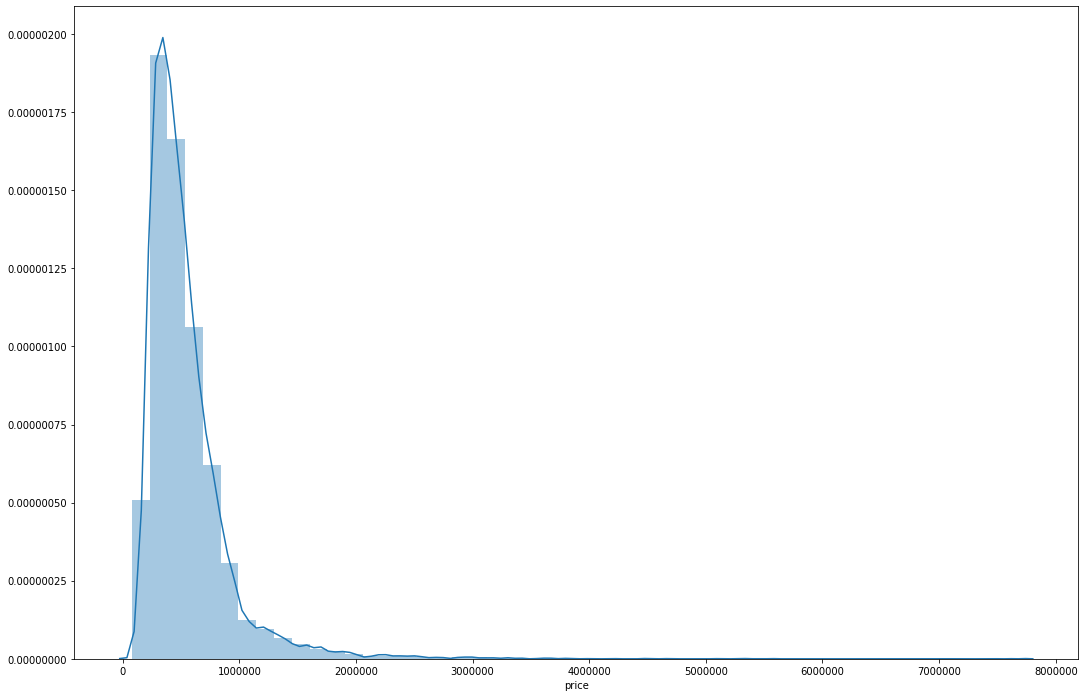

In [38]:
plt.figure(figsize = (18,12))
sns.distplot(df['price'])

In [39]:
len(df) * 0.01

215.97

In [40]:
df = df.sort_values(by = 'price', ascending = True).iloc[:216]

In [41]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570


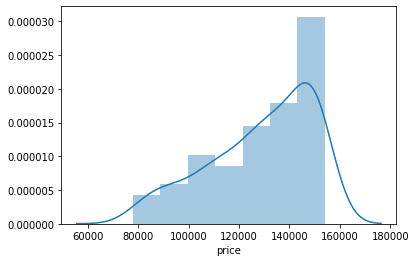

In [42]:
sns.distplot(df['price'])

In [43]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.400410
sqft_above       0.370648
grade            0.313271
bedrooms         0.305416
condition        0.259316
bathrooms        0.203730
yr_built         0.190155
long             0.124326
sqft_basement    0.114295
floors           0.107893
sqft_living15    0.086290
yr_renovated     0.077537
sqft_lot         0.048605
id               0.024762
sqft_lot15      -0.001599
lat             -0.055147
zipcode         -0.060384
waterfront            NaN
view                  NaN
Name: price, dtype: float64

In [44]:
df['year'] = df['date'].apply(lambda x: x.split('/')[2])

In [45]:
df['month'] = df['date'].apply(lambda x: x.split('/')[0])

In [46]:
df.drop(['id', 'date', 'zipcode'], inplace = True, axis = 1)

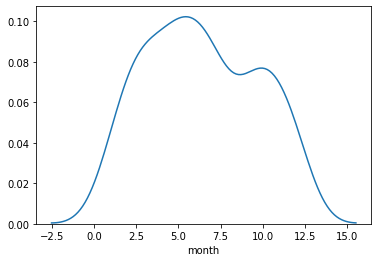

In [50]:
sns.distplot(df['month'].astype(int), df['price'])

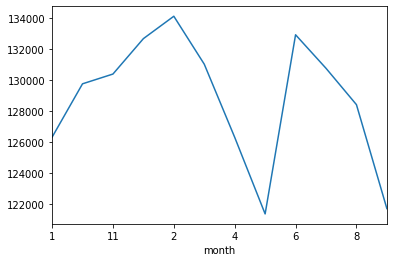

In [53]:
df.groupby('month').mean()['price'].plot()

In [75]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [78]:
X_test.shape

(44, 19)

In [79]:
early_stop = EarlyStopping(patience = 2, monitor = 'val_loss')

In [150]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')

In [151]:
model.fit(X_train, y_train,
         epochs = 600, batch_size = 128,
         validation_data = (X_test, y_test),
         callbacks = [early_stop])

Train on 172 samples, validate on 44 samples
Epoch 1/600
172/172 [==============================] - 1s 6ms/sample - loss: 16776376320.0000 - val_loss: 17927688192.0000
Epoch 2/600
172/172 [==============================] - 0s 227us/sample - loss: 16776361341.0233 - val_loss: 17927673856.0000
Epoch 3/600
172/172 [==============================] - 0s 235us/sample - loss: 16776344456.9302 - val_loss: 17927655424.0000
Epoch 4/600
172/172 [==============================] - 0s 217us/sample - loss: 16776323453.0233 - val_loss: 17927630848.0000
Epoch 5/600
172/172 [==============================] - 0s 223us/sample - loss: 16776291256.5581 - val_loss: 17927593984.0000
Epoch 6/600
172/172 [==============================] - 0s 201us/sample - loss: 16776253463.8140 - val_loss: 17927548928.0000
Epoch 7/600
172/172 [==============================] - 0s 237us/sample - loss: 16776214551.8140 - val_loss: 17927485440.0000
Epoch 8/600
172/172 [==============================] - 0s 198us/sample - loss: 167

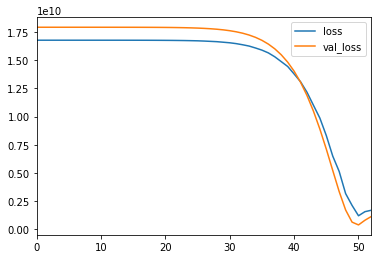

In [152]:
pd.DataFrame(model.history.history).plot()

In [153]:
pred = model.predict(X_test)

In [157]:
pred[0]

array([157208.83], dtype=float32)

In [158]:
y_test[0]

152000.0